# Mobile price range prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file=pd.read_csv(r"C:\Users\admin\Desktop\Imarticus\Mobile_data.csv")
df=pd.DataFrame(file)
df

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,2
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,3
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,0


**exploratory data analysis**

In [3]:
df.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


In [5]:
df.isna().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

there is no duplicates

In [6]:
df[df.duplicated()]

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range


there is no duplicates

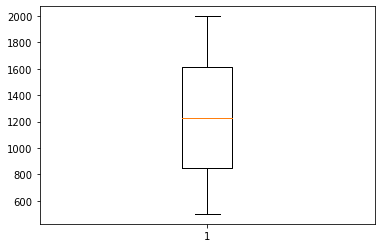

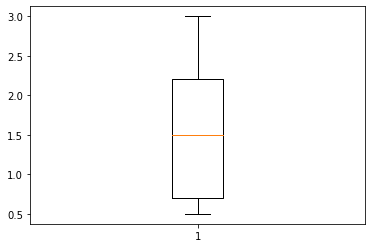

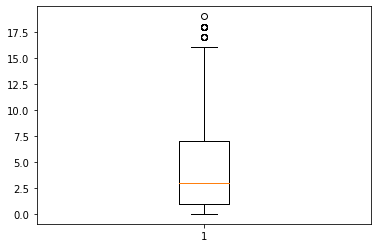

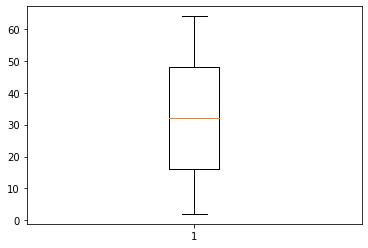

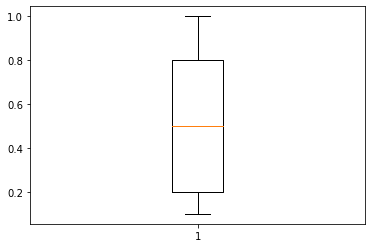

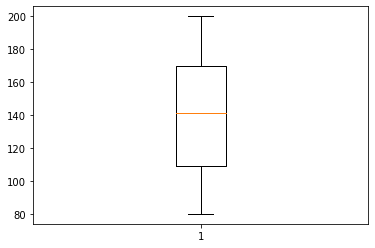

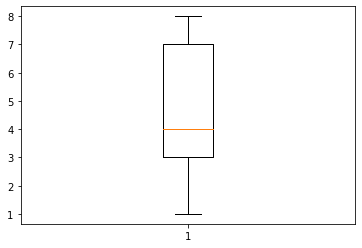

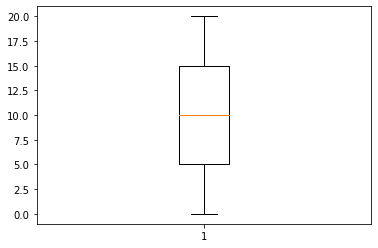

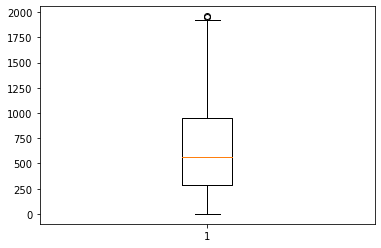

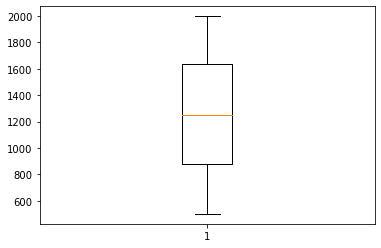

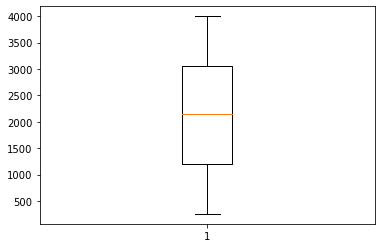

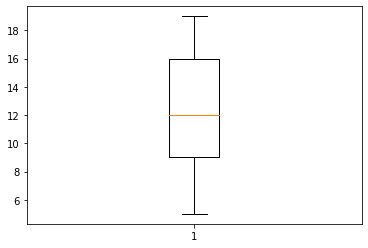

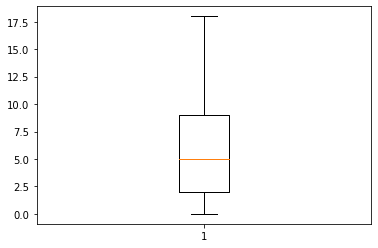

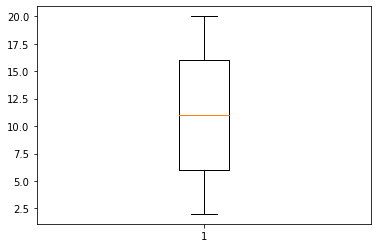

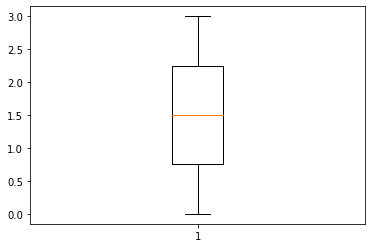

In [7]:
for i in df:
  plt.boxplot(df[i])
  plt.show()
  q1=df[i].quantile(0.25)
  q3=df[i].quantile(0.75)
  iqr=q3-q1
  lower=q1-(1.5*iqr)
  upper=q3+(1.5*iqr)
  df[i]=np.where(df[i]>upper,upper,df[i])
  df[i]=np.where(df[i]<lower,lower,df[i])

after removing outliers

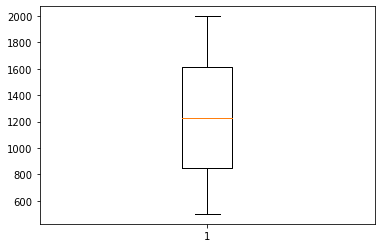

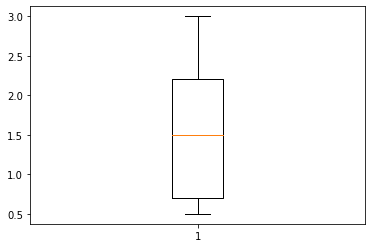

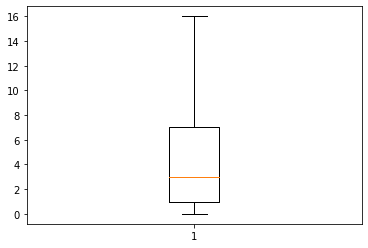

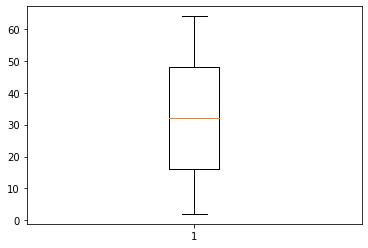

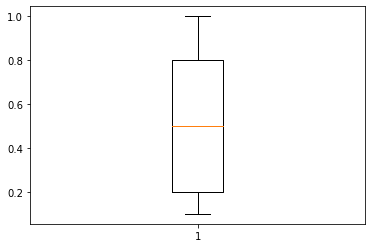

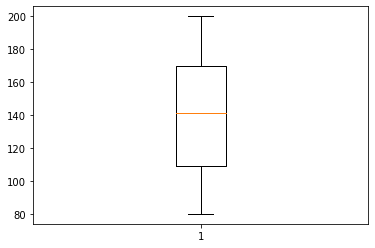

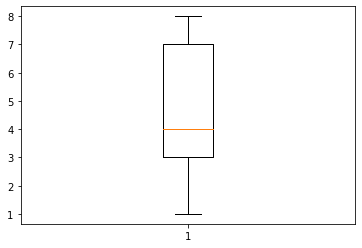

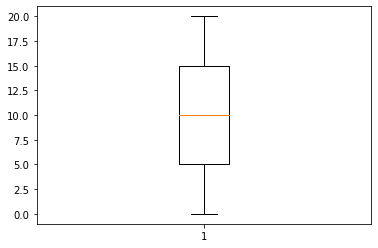

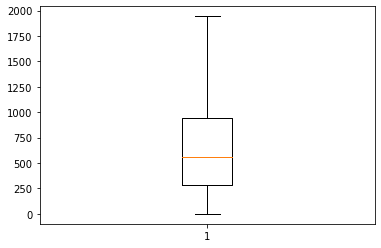

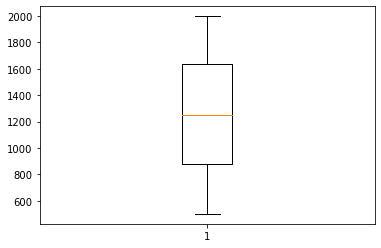

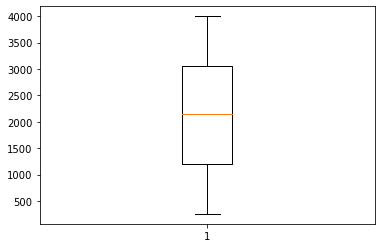

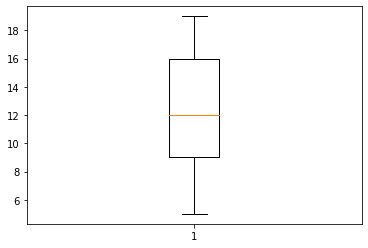

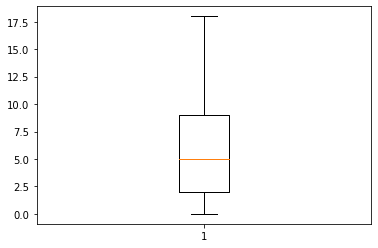

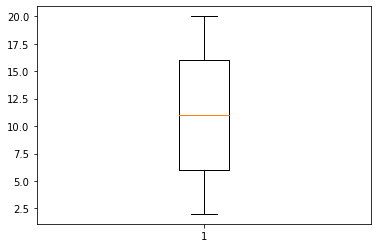

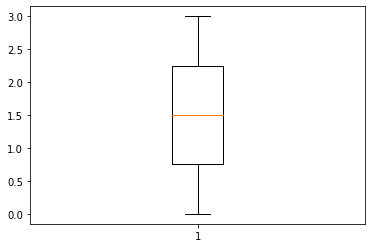

In [8]:
for i in df:
  plt.boxplot(df[i])
  plt.show()

In [9]:
df.corr().style.background_gradient(cmap='coolwarm')

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
battery_power,1.000000,0.011482,0.032119,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014900,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.200723
clock_speed,0.011482,1.000000,-0.000897,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014519,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.006606
fc,0.032119,-0.000897,1.000000,-0.028623,-0.001102,0.022640,-0.012269,0.645716,-0.011983,-0.005688,0.016123,-0.010287,-0.011440,-0.006808,0.022491
int_memory,-0.004004,0.006545,-0.028623,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010422,-0.008335,0.032813,0.037771,0.011731,-0.002790,0.044435
m_dep,0.034085,-0.014364,-0.001102,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025254,0.023566,-0.009434,-0.025348,-0.018388,0.017003,0.000853
mobile_wt,0.001844,0.012350,0.022640,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000960,0.000090,-0.002581,-0.033855,-0.020761,0.006209,-0.030302
n_cores,-0.029727,-0.005724,-0.012269,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006893,0.024480,0.004868,-0.000315,0.025826,0.013148,0.004399
pc,0.031441,-0.005245,0.645716,-0.033273,0.026282,0.018844,-0.001193,1.000000,-0.018440,0.004196,0.028984,0.004938,-0.023819,0.014657,0.033599
px_height,0.014900,-0.014519,-0.011983,0.010422,0.025254,0.000960,-0.006893,-0.018440,1.000000,0.510661,-0.020349,0.059589,0.042992,-0.010667,0.148852
px_width,-0.008402,-0.009476,-0.005688,-0.008335,0.023566,0.000090,0.024480,0.004196,0.510661,1.000000,0.004105,0.021599,0.034699,0.006720,0.165818


(array([500.,   0.,   0., 500.,   0.,   0., 500.,   0.,   0., 500.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

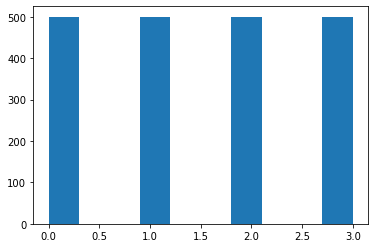

In [10]:
plt.hist(df['price_range'])

# preprocessing

In [11]:
x=df.iloc[:,:-1]
x.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842.0,2.2,1.0,7.0,0.6,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19.0
1,1021.0,0.5,0.0,53.0,0.7,136.0,3.0,6.0,905.0,1988.0,2631.0,17.0,3.0,7.0
2,563.0,0.5,2.0,41.0,0.9,145.0,5.0,6.0,1263.0,1716.0,2603.0,11.0,2.0,9.0
3,615.0,2.5,0.0,10.0,0.8,131.0,6.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,11.0
4,1821.0,1.2,13.0,44.0,0.6,141.0,2.0,14.0,1208.0,1212.0,1411.0,8.0,2.0,15.0


In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [13]:
y=df.iloc[:,-1]
y.head()

0    1.0
1    2.0
2    2.0
3    2.0
4    1.0
Name: price_range, dtype: float64

# FITTING THE MODEL

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [16]:
y_pred=knn.predict(x_test)

In [17]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('accuracy score ',accuracy_score(y_test,y_pred)) 
print('classification_report')
classification_report(y_test,y_pred)
print('confusion_matrix')
confusion_matrix(y_test,y_pred)

accuracy score  0.6424242424242425
classification_report
confusion_matrix


array([[128,  39,   2,   0],
       [ 36,  92,  34,   0],
       [  5,  54,  90,  13],
       [  1,   4,  48, 114]], dtype=int64)

# CHOOSING BEST K VALUE

In [18]:
error=[]
for i in range(2,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_test)
  error.append(np.mean(y_pred!=y_test))
error

[0.4712121212121212,
 0.4636363636363636,
 0.44242424242424244,
 0.3984848484848485,
 0.41818181818181815,
 0.39090909090909093,
 0.3606060606060606,
 0.37424242424242427,
 0.37727272727272726,
 0.35,
 0.3560606060606061,
 0.3515151515151515,
 0.3575757575757576,
 0.3575757575757576,
 0.3484848484848485,
 0.34545454545454546,
 0.3575757575757576,
 0.3424242424242424,
 0.33636363636363636,
 0.34545454545454546,
 0.3515151515151515,
 0.3515151515151515,
 0.36363636363636365,
 0.36363636363636365,
 0.3560606060606061,
 0.3621212121212121,
 0.3575757575757576,
 0.3560606060606061,
 0.35,
 0.34393939393939393,
 0.3303030303030303,
 0.3393939393939394,
 0.33484848484848484,
 0.35,
 0.33636363636363636,
 0.34545454545454546,
 0.346969696969697,
 0.34545454545454546]

Text(0, 0.5, 'error')

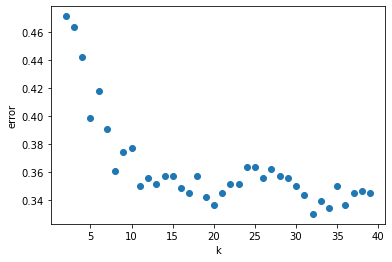

In [19]:
k=range(2,40)
plt.scatter(k,error)
plt.xlabel('k')
plt.ylabel('error')

from the above, i found that the optimum k values is 39

In [20]:
knn=KNeighborsClassifier(n_neighbors=i)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred=knn.predict(x_test)
print('accuracy score ',accuracy_score(y_test,y_pred)) 
print('classification_report')
classification_report(y_test,y_pred)
print('confusion_matrix')
confusion_matrix(y_test,y_pred)

accuracy score  0.6545454545454545
classification_report
confusion_matrix


array([[131,  38,   0,   0],
       [ 36,  89,  36,   1],
       [  1,  53,  92,  16],
       [  0,   3,  44, 120]], dtype=int64)